In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

24


In [4]:
import cPickle
import gzip
testResults1, testResults2, testResults3 = cPickle.load(gzip.GzipFile('testResults-copy5.p.gz','rb'))

methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_noDecorr']

In [14]:
tr = testResults1
TP = pd.DataFrame({key: np.array([t[key]['TP'] for t in tr]) for key in methods})
FN = pd.DataFrame({key: np.array([t[key]['FN'] for t in tr]) for key in methods})
FP = pd.DataFrame({key: np.array([t[key]['FP'] for t in tr]) for key in methods})

TP['ppm'] = np.array([t['ppm'] for t in tr])
FP['ppm'] = np.array([t['ppm'] for t in tr])
FN['ppm'] = np.array([t['ppm'] for t in tr])

tmp1 = FP[['ppm','ALstack']]
tmp2 = FP[['ppm', 'SZOGY']]
tmp1['method'] = np.repeat('ALstack', tmp1.shape[0])
tmp2['method'] = np.repeat('SZOGY', tmp2.shape[0])
tmp1.columns.values[1] = tmp2.columns.values[1] = 'FP'
tmp = pd.concat((tmp1, tmp2))

sizeme(tmp.head())

/nfs/home/reiss/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/nfs/home/reiss/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ppm,FP,method
0,0,0,ALstack
1,1,0,ALstack
2,2,0,ALstack
3,3,0,ALstack
4,4,0,ALstack


(-1, 11)

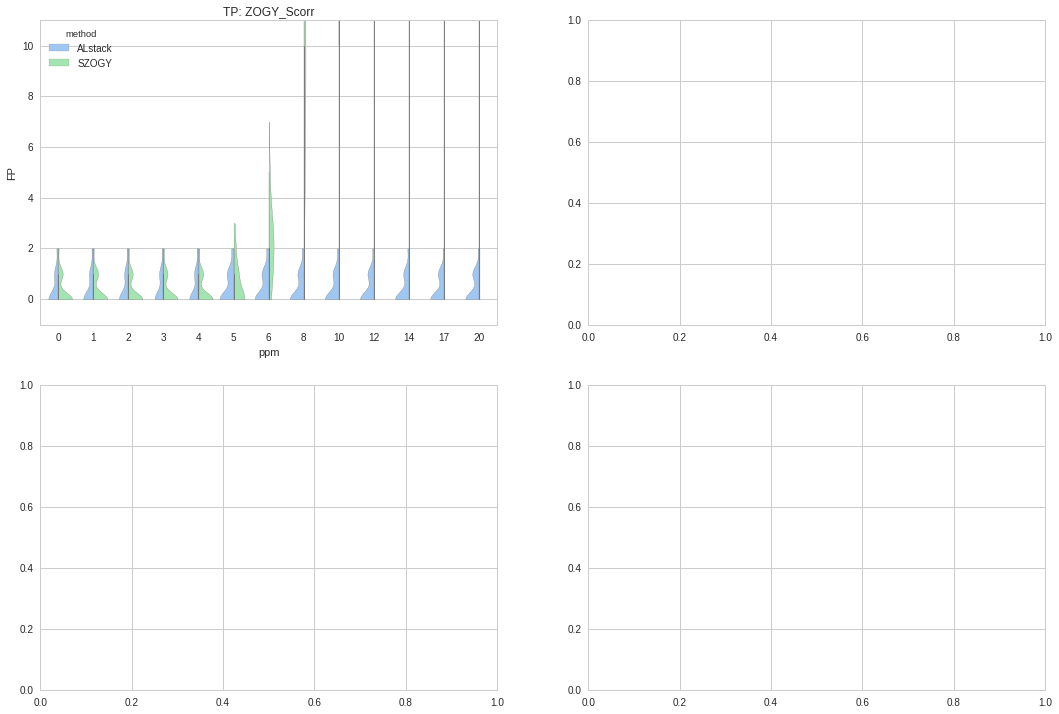

In [17]:
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.violinplot(x='ppm', y='FP', data=tmp, split=True, hue='method', inner="box", cut=0, 
               linewidth=0.3, bw=0.5, ax=axes[0][0])
axes[0][0].set_title('TP: ZOGY_Scorr')
axes[0][0].set_ylim((-1, 11))
